In [3]:
df= pd.read_csv(r"C:\Users\rabik\OneDrive\Desktop\Data Science for Business Package\2. Marketing Department\Marketing_data.csv")

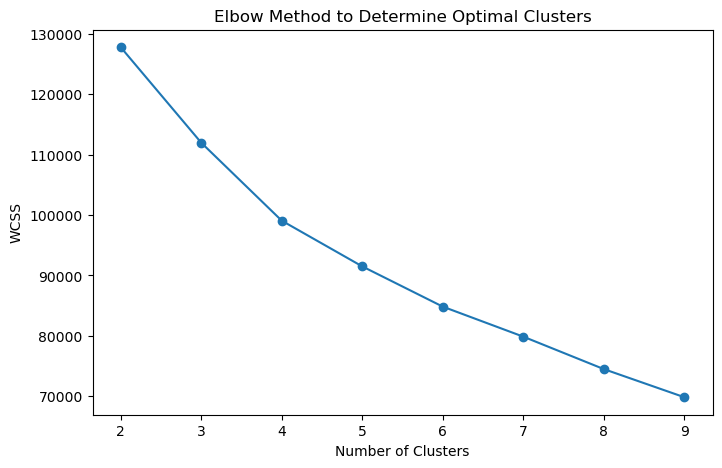

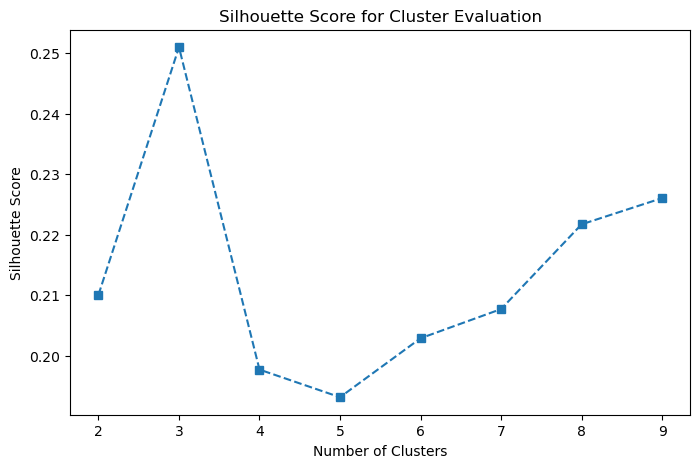

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
Cluster,,,,,,,,,,,,,,,,,
0,1012.658327,0.789924,270.041785,209.937299,60.371441,596.509903,0.170145,0.086301,0.080558,0.114846,2.125471,2.903193,3278.640516,974.260054,553.900449,0.077981,11.446568
1,3551.153761,0.986879,7681.620098,5095.878826,2587.208264,653.638891,0.946418,0.739031,0.788060,0.071290,2.085575,89.359413,9696.943765,7288.739497,1972.767288,0.286707,11.951100
2,4602.449658,0.968389,501.862982,320.188797,181.759123,4521.509581,0.287832,0.138911,0.185671,0.484792,14.294904,7.665831,7546.160857,3484.054216,2003.674460,0.034888,11.386800
3,894.907458,0.934734,1236.178934,593.974874,642.478274,210.570626,0.885165,0.297070,0.711842,0.042573,0.790021,22.091773,4213.207678,1332.194205,639.677258,0.269258,11.594595


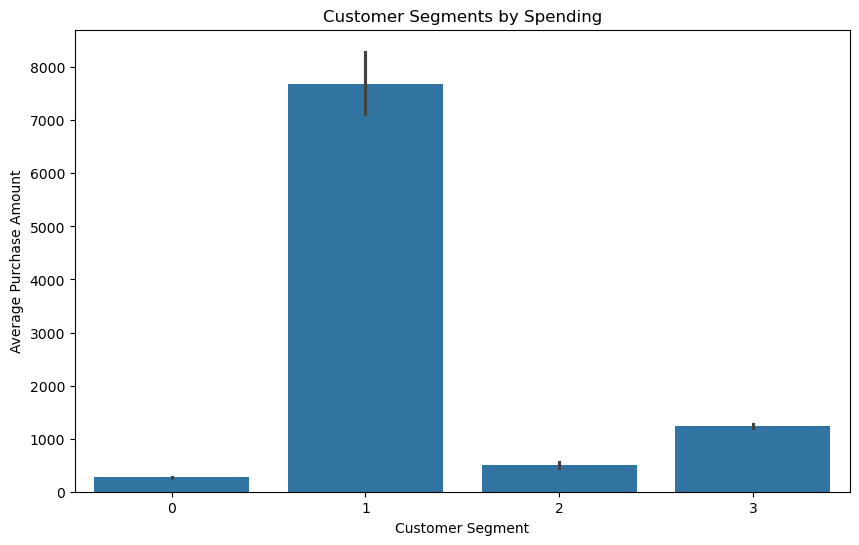

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load Dataset
df= pd.read_csv(r"C:\Users\rabik\OneDrive\Desktop\Data Science for Business Package\2. Marketing Department\Marketing_data.csv")

# Data Cleaning: Handle missing values
df.fillna(df.select_dtypes(include=[np.number]).median(), inplace=True)


# Feature Selection: Drop Customer ID as it's not useful for clustering
df.drop(columns=['CUST_ID'], inplace=True)

# Standardizing Data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Elbow Method to Find Optimal Clusters
wcss = []
k_range = range(2, 10)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(k_range, wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method to Determine Optimal Clusters')
plt.show()

# Silhouette Score Evaluation
silhouette_scores = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df_scaled)
    silhouette_scores.append(silhouette_score(df_scaled, labels))

plt.figure(figsize=(8,5))
plt.plot(k_range, silhouette_scores, marker='s', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Cluster Evaluation')
plt.show()

# Applying KMeans with optimal clusters (Assume 4 based on Elbow & Silhouette method)
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# Profile Clusters
cluster_means = df.groupby('Cluster').mean()
display(cluster_means)

# Visualizing Spending Patterns per Cluster
plt.figure(figsize=(10, 6))
sns.barplot(x=df['Cluster'], y=df['PURCHASES'])
plt.xlabel("Customer Segment")
plt.ylabel("Average Purchase Amount")
plt.title("Customer Segments by Spending")
plt.show()

# Generating Marketing Recommendations
recommendations = {
    0: "High spenders - Target with exclusive rewards & premium offers",
    1: "Installment buyers - Promote installment-based discounts",
    2: "Cash advance users - Provide financial planning tools",
    3: "Low engagement users - Offer personalized promotions & incentives"
}

df['Marketing Strategy'] = df['Cluster'].map(recommendations)

# Save Updated Data with Recommendations
df.to_csv("Customer_Segmentation_with_Insights.csv", index=False)
